# loading the classes 

In [1]:
import sys
sys.path.append('..')

from my_package.data_cleaning import *
from my_package.modeling import *
from my_package.preprocessing import *
from my_package.nn_modeling import *

# Splitting the data

In [2]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42) 

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

# reading the data

In [3]:
# reading the base csv file using the custom class
df=data_cleaning('Base.csv')

In [4]:
df.data['income']= df.data['income'].astype(float)
df.data['customer_age']= df.data['customer_age'].astype(int)
df.data['email_is_free']=df.data['email_is_free'].astype(int)
df.data['phone_home_valid']=df.data['phone_home_valid'].astype(int)
df.data['phone_mobile_valid']=df.data['phone_mobile_valid'].astype(int)
df.data['has_other_cards']=df.data['has_other_cards'].astype(int)
df.data['foreign_request']=df.data['foreign_request'].astype(int)
df.data['keep_alive_session']=df.data['keep_alive_session'].astype(int)
df.data['source']=df.data['source'].astype('object')
df.data['device_distinct_emails_8w']=df.data['device_distinct_emails_8w'].astype(int)

In [5]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


### data validity:

In [6]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  float64 
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  int32   
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

- in the data cleaning class ,we have reformated the columns to there suitable data type and deleted the device_fraud_count column as it was constant for all the records.
- we changed the age and income to category as both of them have set of 10 values only.
- and reformat the categorical columns to category to save memory also.

In [7]:
# check the number of duplicates using the custom class
df.check_duplicates()

'this data has no duplicates'

In [8]:
# describe the numerical features:
df.describe(flag='numerical')

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,...,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,3.288674
std,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,...,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,2.209994
min,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,...,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
1%,0.100000,0.021672,-1.000000,0.000000,10.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,...,0.000000,0.000000,-1.000000,0.000000,200.000000,0.000000,0.651256,0.000000,1.000000,0.000000
25%,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,...,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,1.000000
50%,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,...,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,3.000000
75%,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,...,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,5.000000
99%,0.900000,0.997470,231.000000,370.000000,60.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,...,1.000000,1.000000,31.000000,1.000000,1500.000000,1.000000,44.552828,1.000000,2.000000,7.000000
max,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,...,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,7.000000


### findings from this step:
- the prev_address_month contain missing data with -ve flag we have created a function to replace the -ve values with nan according to the datasheet.
- also the current address month count have missing values and possible outliers.
- there are many columns with outliers: intended_balcon,zip_count,velocity,data_of_birth_distinct_email,proposed_credit limit and session length in minutes.

In [9]:
df.describe(flag='categorical')

,fraud_bool,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,5,7,7,2,5
top,0,AB,CA,BC,INTERNET,other
freq,988971,370554,730252,372143,992952,342728


# check the nulls:

In [10]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


- we have 5 columns with nulls according to the datasheet (where the negative value is not acceptable in those columns).
- in the next cell i use put_nulls method which will replace the -ve values in this data with nan.

In [11]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

### identify the missing values pattern:

<AxesSubplot: >

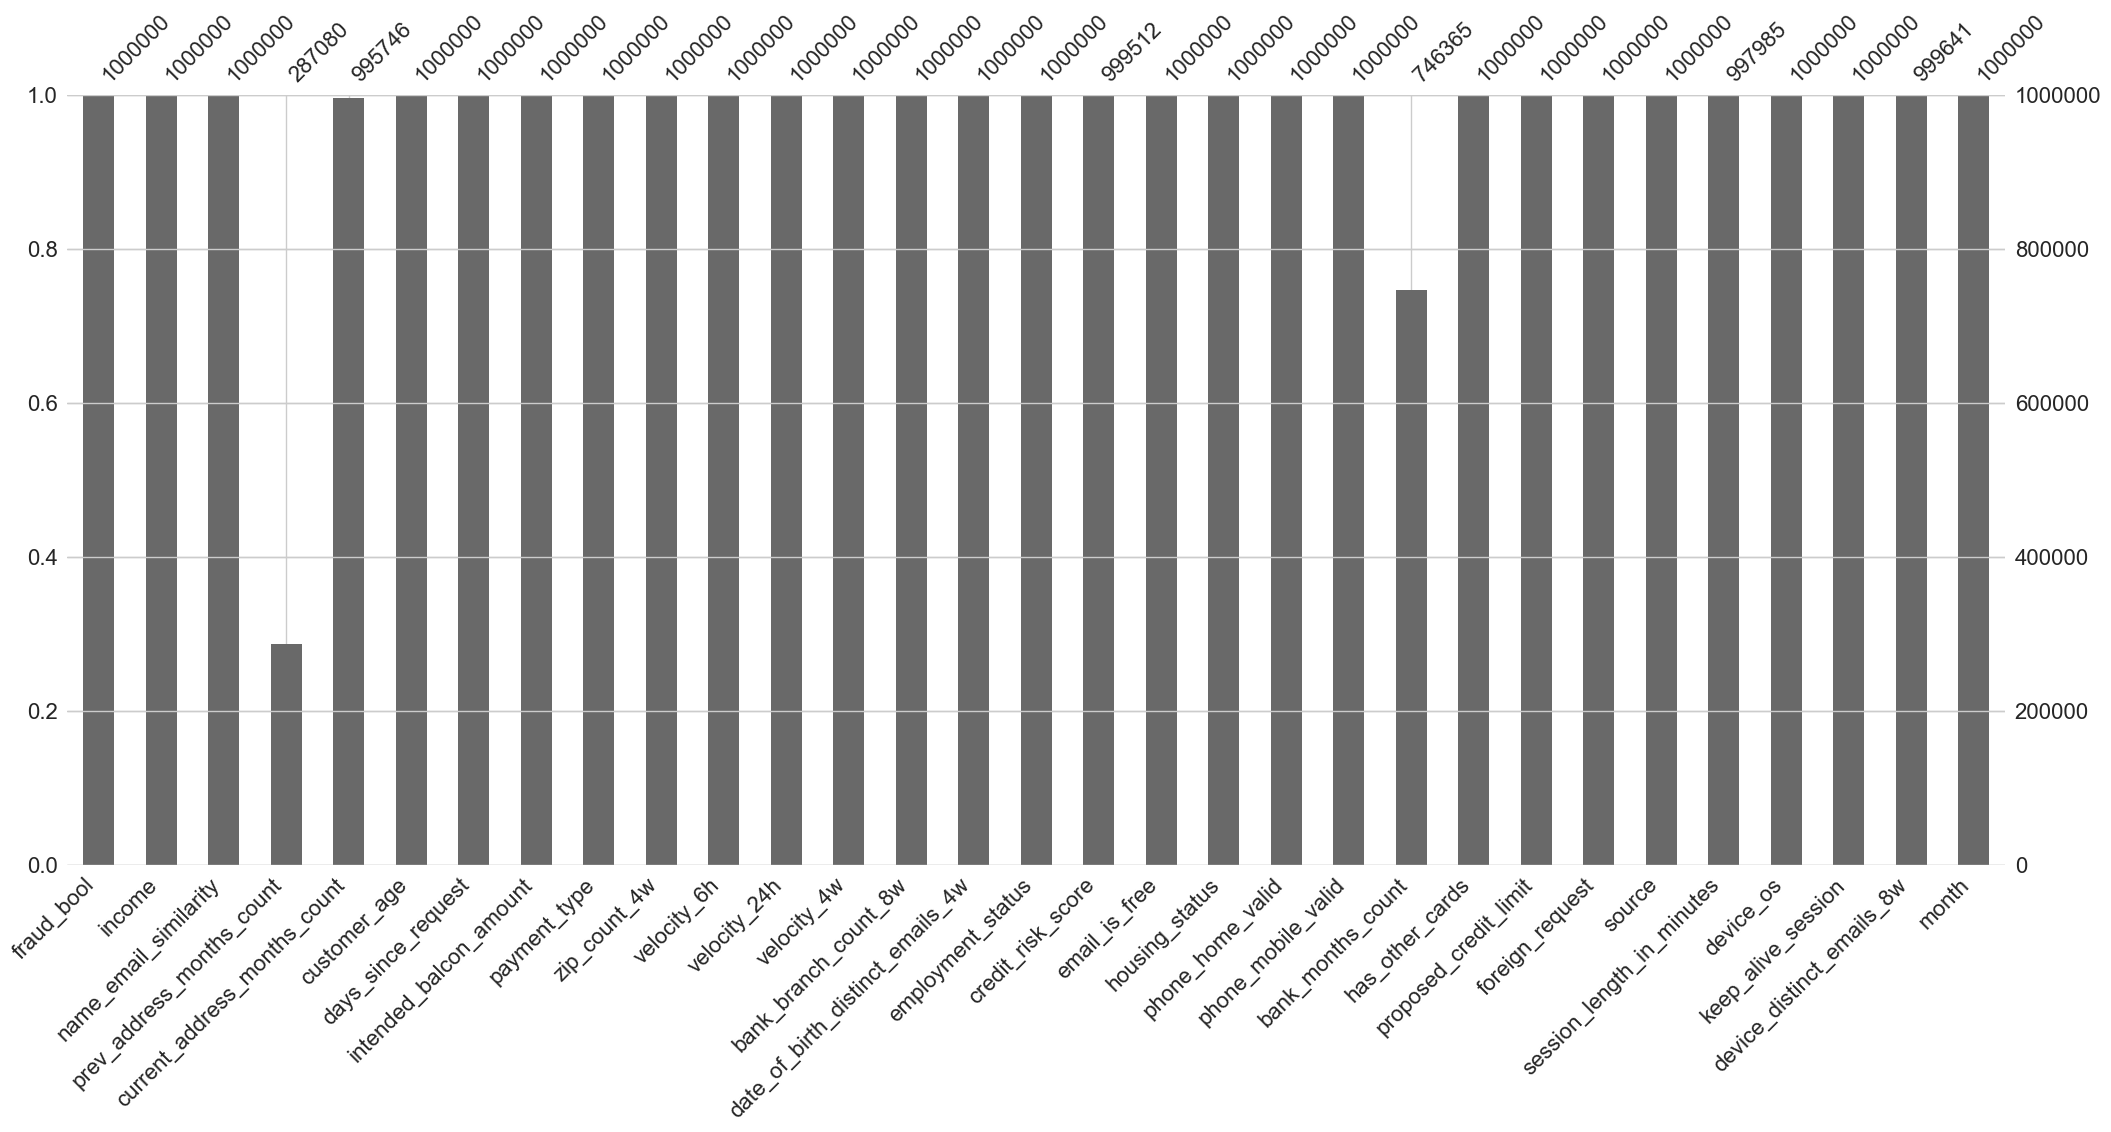

In [12]:
msno.bar(df.data)

<AxesSubplot: >

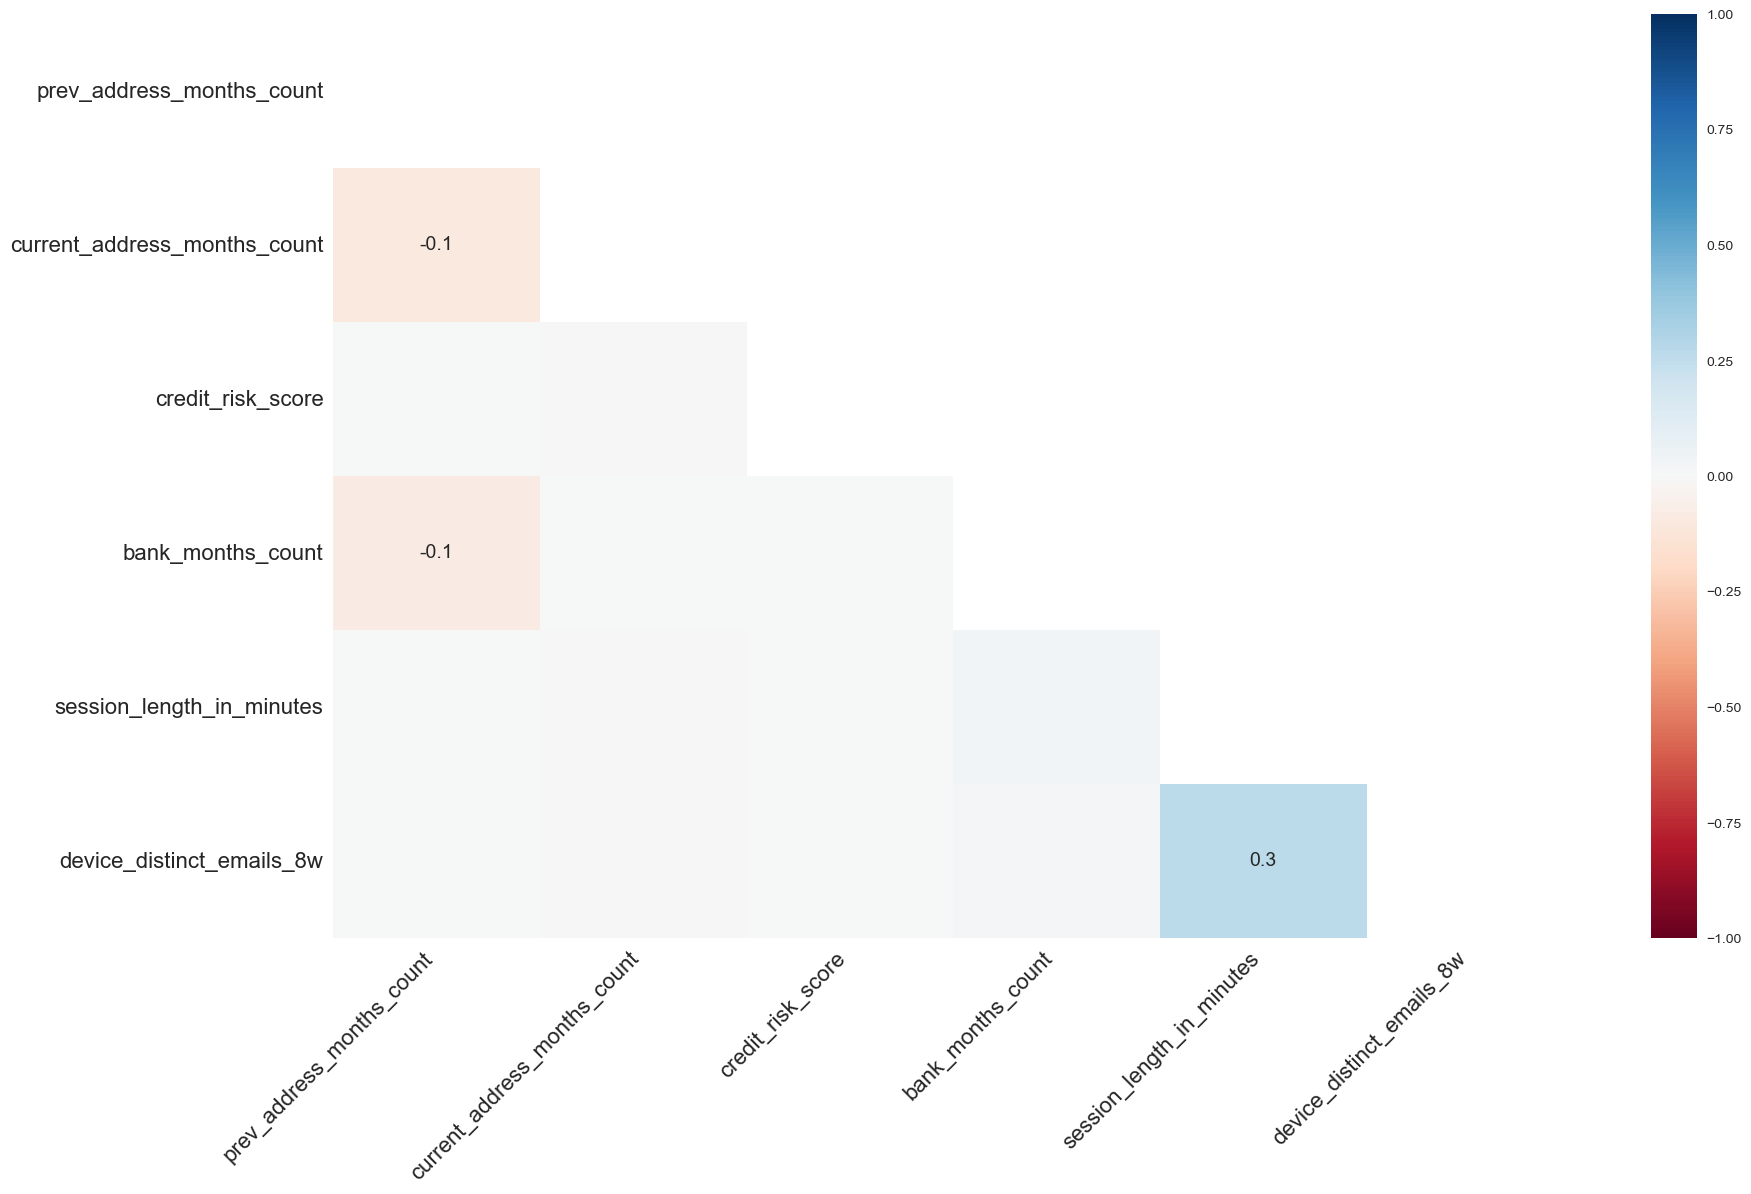

In [13]:
msno.heatmap(df.data)

- there is no correlation between the missing values. 

<AxesSubplot: >

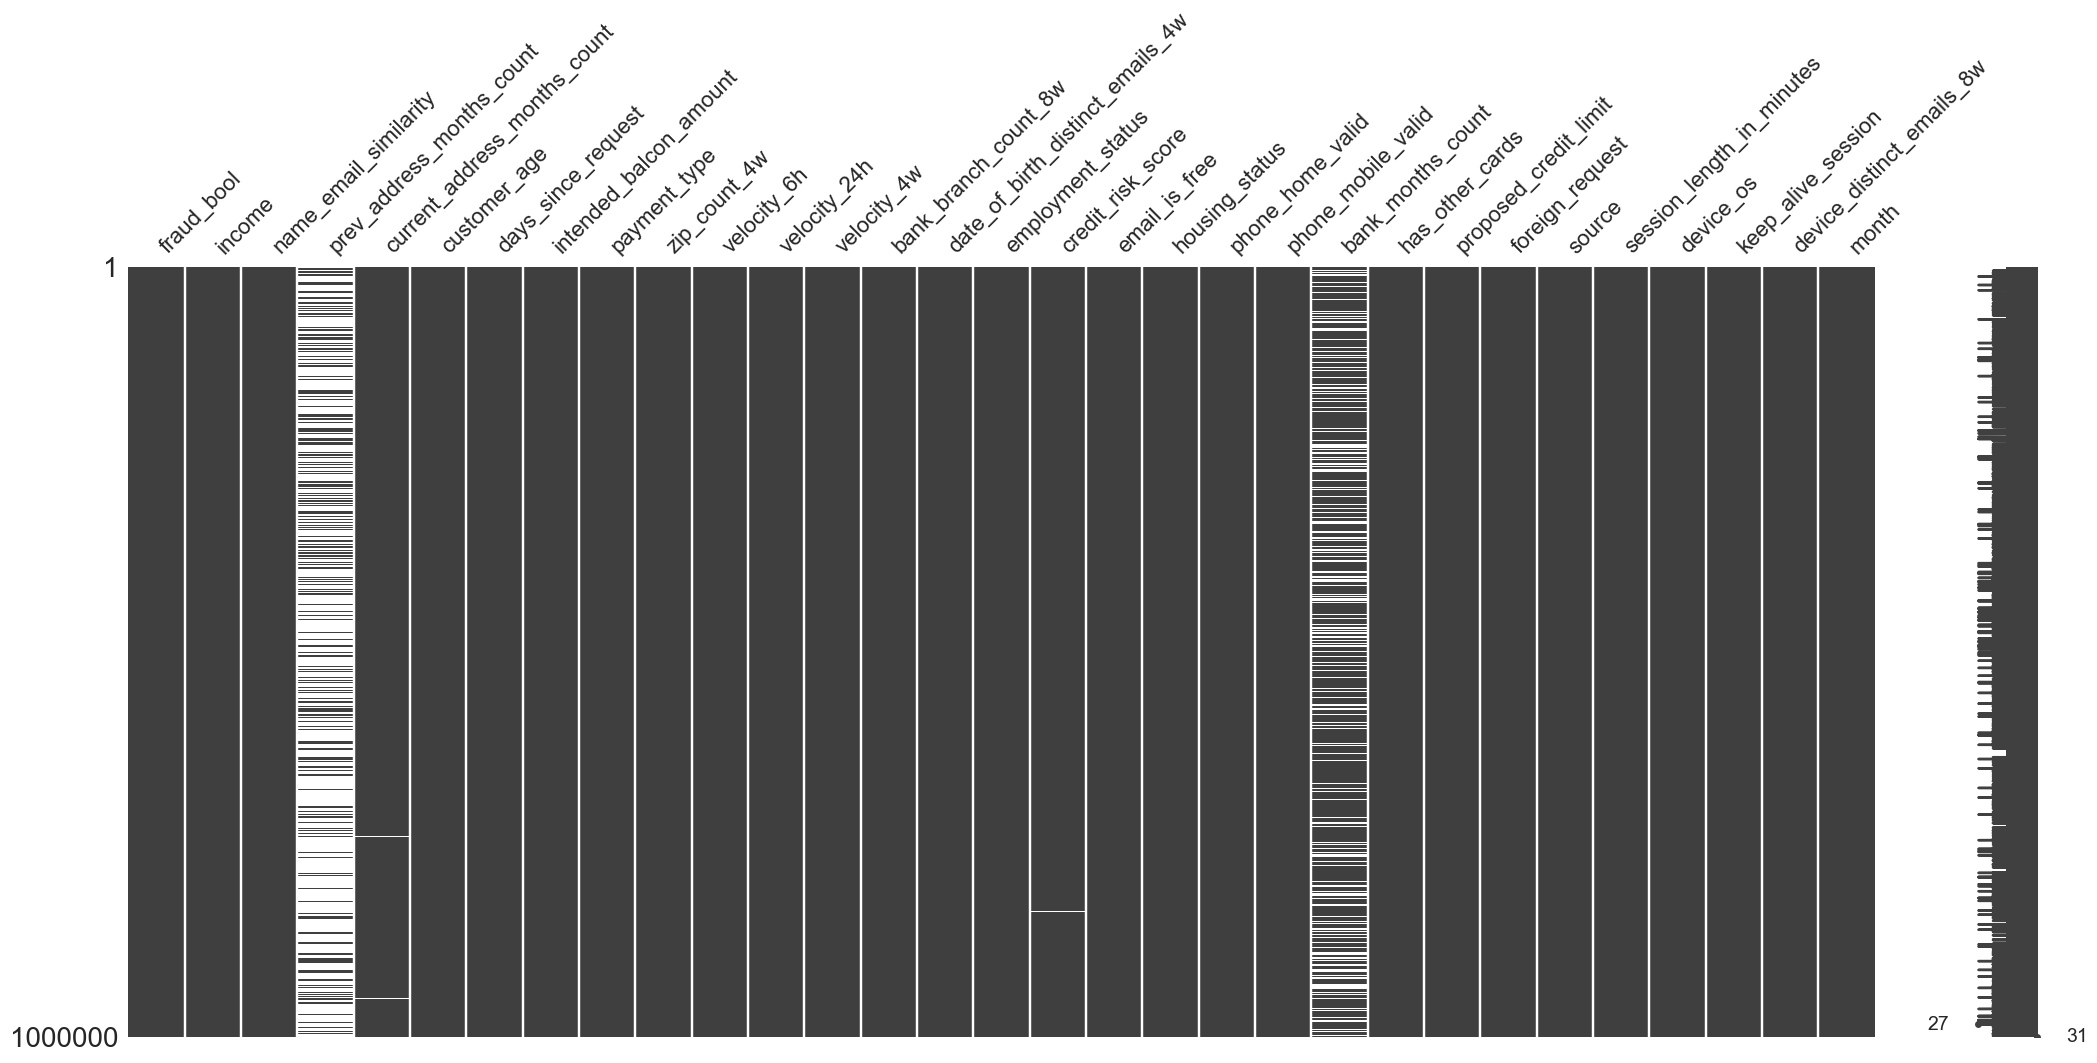

In [14]:
msno.matrix(df.data)

- after this analysis we can say that the pattern of missing values is MCAR.
- i will delete prev_address_months_count as about 70% of the rows have nulls.

In [15]:
df.delete_columns(['prev_address_months_count'])

'Columns prev_address_months_count deleted successfully.'

### Handling the nulls:
- i will replace the nulls of the continous columns with the mean, while using the mode for the categorical columns.

In [16]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mode()[0],inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['bank_months_count'].fillna(df.data.bank_months_count.mode()[0],inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

# correlation matrix:

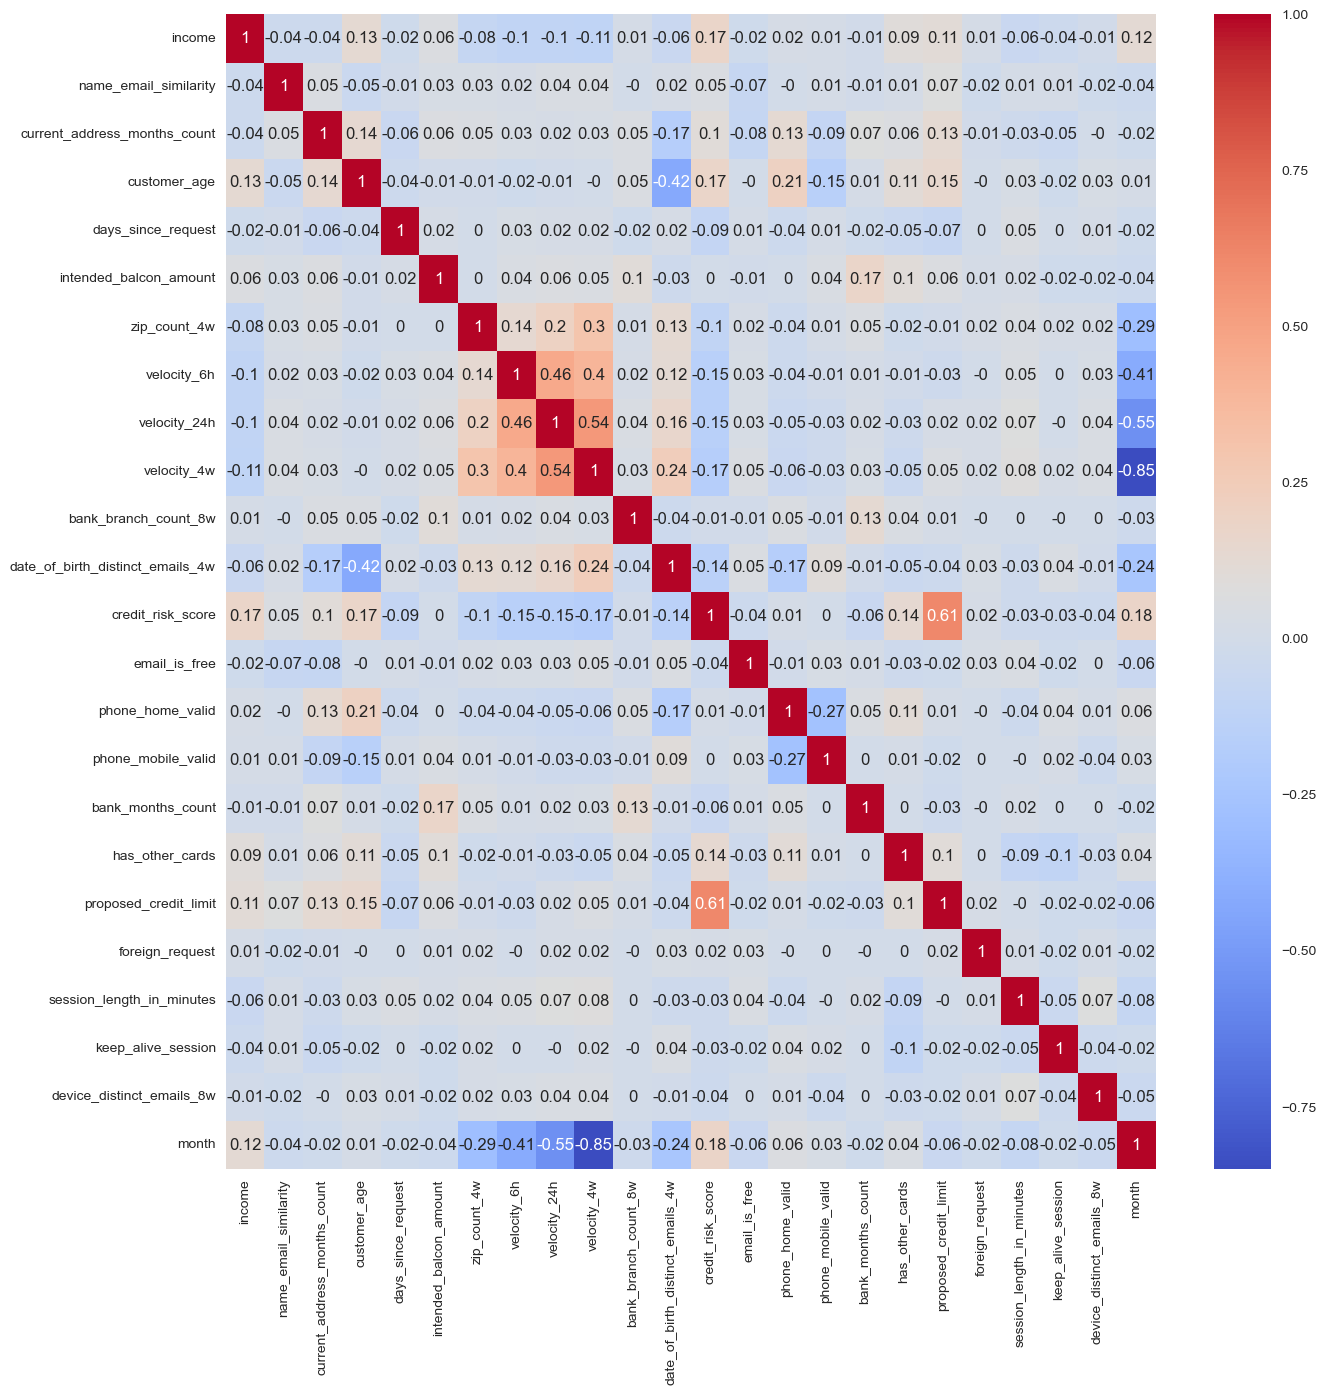

In [17]:
## check the corrrelation between the numerical columns using pearson correlation
df.plot_corr_heatmap()

income                             -0.386337
velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
bank_months_count                   0.533668
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.388237
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
device_distinct_emails_8w           3.126722
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


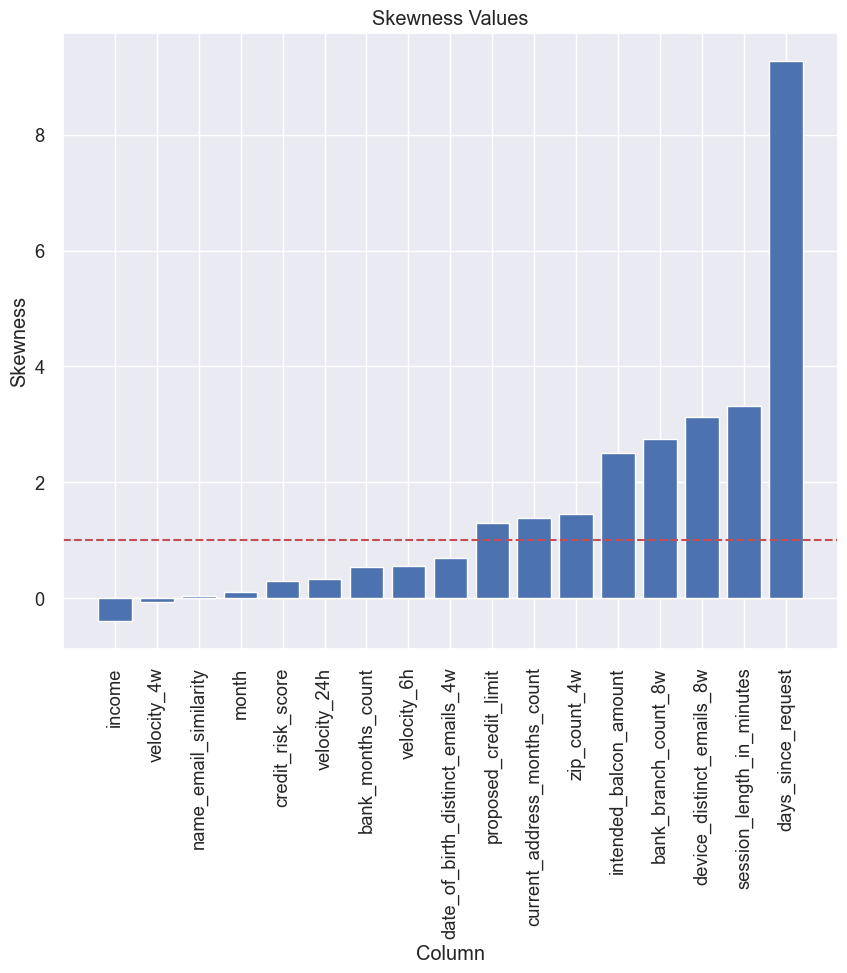

In [19]:
# checking the skewness of numerical features
skewed_columns=df.draw_skewness_barchart()

- as we can see we have many numerical features with high skewness so i will use log transform to handle the skewness.
- i will exclude the intended balcon amount as it contain negative values so the log will return nulls.

In [20]:
data=df.get_data()

### splitting the data

In [21]:
# split the data according to the paper criteria 0-5 month for training and 6-7 for testing 
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

### forming the groups to test fairness 

In [22]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

In [23]:
data = preprocessing(X_train, y_train)

## preprocessing:
- in the baseline experiments we have use the robust scaler and one hot encoding for preprocessing.

In [24]:
# define a dictionary with the key is the name of the column and the value is the scaler object which is returned from the method
# in the preprocessing class.
scalers = {} 
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('robust',column)
    scalers[column] = scaler

In [25]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

In [26]:
# define dictionary with key name of the column and value the label encoder fitted on the training set in the preprocessing class
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'one-hot')
    encoders[column] = encoder

In [27]:
# apply the encoding on the testset
for column in X_test.select_dtypes(include=['object','category']).columns:
    ohe=encoders[column]
    encoded_col = pd.DataFrame(ohe.transform(X_test[column].values.reshape(-1, 1)).toarray(),index=X_test.index)
    encoded_col.columns = [column + '_' + str(val) for val in ohe.categories_[0]]
    X_test = pd.concat([X_test, encoded_col], axis=1)
    X_test.drop(columns=column, inplace=True,axis=1)  

In [28]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [29]:
X_train,y_train=data.get_data()

In [30]:
X_train_res,y_train_res=data.undersample_data()

In [31]:
y_train_res.value_counts()

0    8151
1    8151
Name: fraud_bool, dtype: int64

In [32]:
# manually remove the last column created after one hot encoding
cols=['income', 'name_email_similarity', 
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w','payment_type_AB',
       'payment_type_AC', 'payment_type_AD', 'payment_type_AE',
        'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'housing_status_BF', 'housing_status_BG', 
       'source_TELEAPP',  'device_os_macintosh',
       'device_os_other', 'device_os_windows', 'device_os_x11']
X_train_res=X_train_res[cols]
X_test=X_test[cols]

In [33]:
# define modeling instance to start the experiment the modeling instance takes the data and the groups.
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

# model selection

## logistic regression:

In [34]:
# use the best hyperparameter values which we get from step 1
param_grid = {'class_weight':['balanced'],
             'penalty': ['l2'],
             'C': [0.01]}
lr = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.01}
Best estimator: LogisticRegression(C=0.01, class_weight='balanced')
Best score: 0.8625996981783878
AUC: 0.8696777791194644
TPR:  47.12% 
FPR:  4.99% 
Threshold:  0.75
Predictive Equality:  95.99%


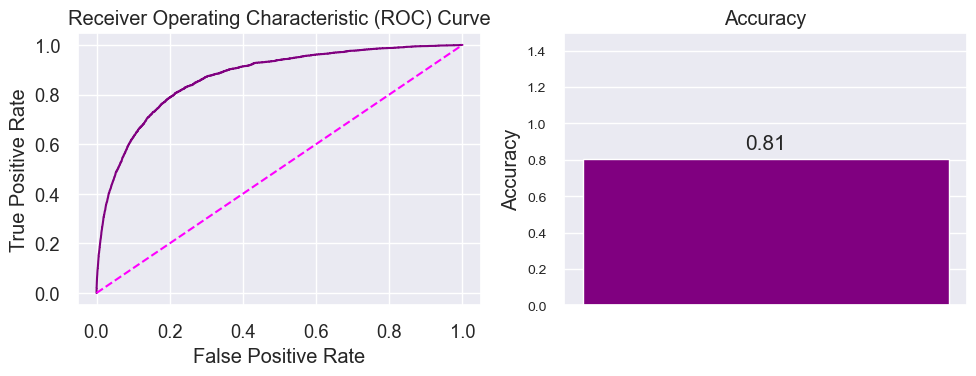

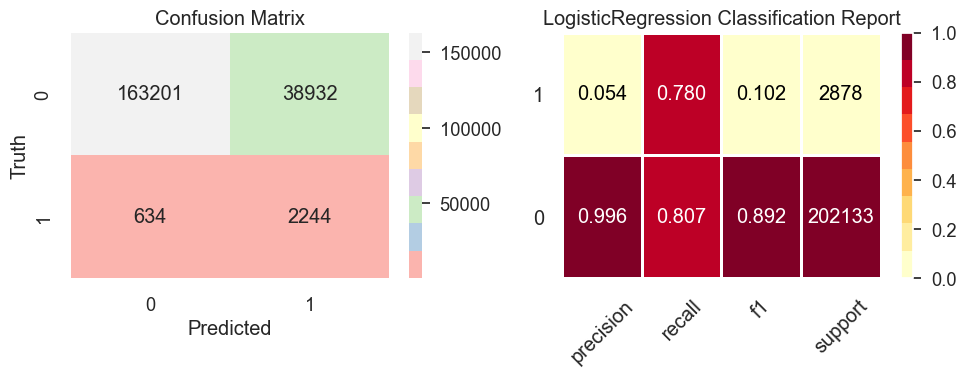

CPU times: total: 5.14 s
Wall time: 3.86 s


In [35]:
%%time
experiment.train(lr,param_grid=param_grid,search_type='random')

In [40]:
saved_model_path = experiment.save_model('random_undersmaple/logistic_regression_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: random_undersmaple/logistic_regression_model.pkl


In [41]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.75, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.47      0.19      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.71      0.58    205011
weighted avg       0.98      0.94      0.96    205011

[[192244   9889]
 [  1533   1345]]


# random forest:

In [42]:
# Define the hyperparameter gained from step 1
param_grid = {
    'n_estimators': [150],              # Number of trees in the forest - Default value is 100
    'max_depth': [10],                # Maximum depth of the trees - Default value is None (unlimited)
    'min_samples_split': [5],           # Minimum number of samples required to split an internal node - Default value is 2
    'class_weight': ['balanced']
}
rf_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10, 'class_weight': 'balanced'}
Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=150)
Best score: 0.8699248154238967
AUC: 0.8701239467321462
TPR:  48.33% 
FPR:  5.0% 
Threshold:  0.69
Predictive Equality:  99.96000000000001%


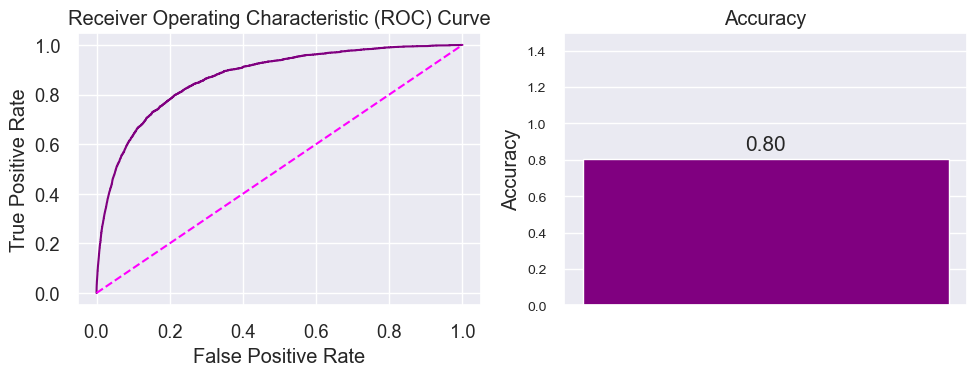

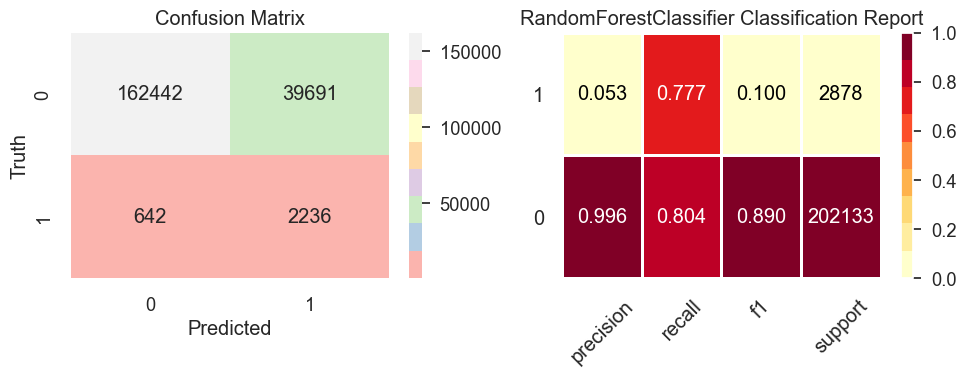

CPU times: total: 25.1 s
Wall time: 29.3 s


In [43]:
%%time
experiment.train(rf_model,param_grid=param_grid,search_type='random')

In [44]:
saved_model_path = experiment.save_model('random_undersmaple/random_forest_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: random_undersmaple/random_forest_model.pkl


In [45]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.69, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.49      0.19      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.72      0.58    205011
weighted avg       0.98      0.94      0.96    205011

[[191685  10448]
 [  1459   1419]]


# XGboost

In [46]:
# Define the XGBClassifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    # 'tree_method': ['gpu_hist'],        # Use GPU for tree building
    'gpu_id': [0],                      # GPU device ID (set to 0 in this case)
    'n_estimators':[200],
    'max_depth':[5],
    
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 200, 'max_depth': 5, 'gpu_id': 0}
Best estimator: XGBClassifier(gpu_id=0, max_depth=5, n_estimators=200)
Best score: 0.883390558069064
AUC: 0.8857911472134398
TPR:  52.080000000000005% 
FPR:  5.0% 
Threshold:  0.85
Predictive Equality:  85.67%


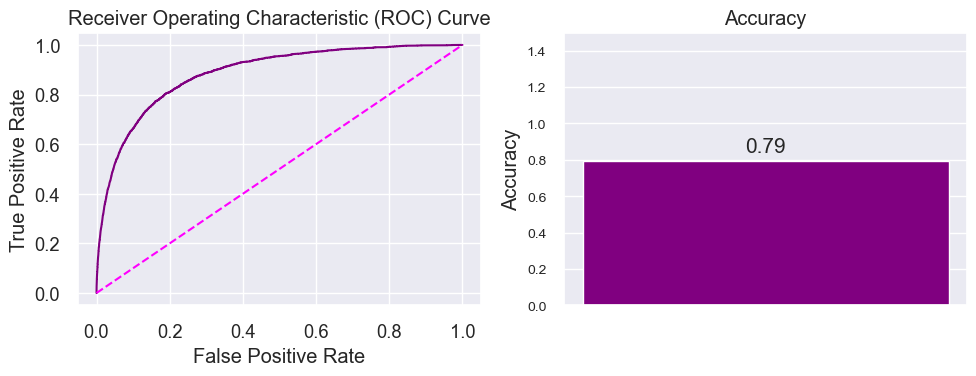

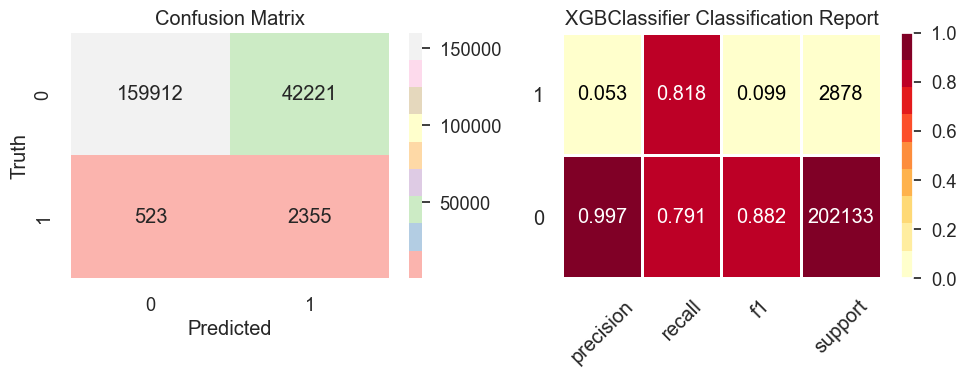

CPU times: total: 18.3 s
Wall time: 26 s


In [47]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

In [48]:
saved_model_path = experiment.save_model('random_undersmaple/xgboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: random_undersmaple/xgboost.pkl


In [49]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.85, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.51      0.21      2878

    accuracy                           0.95    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.95      0.96    205011

[[192317   9816]
 [  1398   1480]]


# using Deep learning

In [50]:
# Keras model using dropout and batch normalization
nn_model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train_res.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
experiment_n=nn_modeling(nn_model, X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

In [52]:
%%time
hist = experiment_n.compile_and_train(lr = 1e-2)

Epoch 1/100
29/29 [==============================] - 2s 18ms/step - loss: 0.6753 - fn: 2835.0000 - fp: 2362.0000 - tn: 5789.0000 - tp: 3685.0000 - precision: 0.6094 - recall: 0.5652 - f1: 0.5888 - val_loss: 0.2085 - val_fn: 156.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 1475.0000 - val_precision: 1.0000 - val_recall: 0.9044 - val_f1: 0.9522
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.5054 - fn: 1942.0000 - fp: 1426.0000 - tn: 6725.0000 - tp: 4578.0000 - precision: 0.7625 - recall: 0.7021 - f1: 0.7316 - val_loss: 0.3002 - val_fn: 205.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 1426.0000 - val_precision: 1.0000 - val_recall: 0.8743 - val_f1: 0.9387
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 0.4940 - fn: 1687.0000 - fp: 1506.0000 - tn: 6645.0000 - tp: 4833.0000 - precision: 0.7624 - recall: 0.7413 - f1: 0.7514 - val_loss: 0.3214 - val_fn: 205.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 142

Epoch 24/100
29/29 [==============================] - 0s 5ms/step - loss: 0.4342 - fn: 1522.0000 - fp: 1287.0000 - tn: 6864.0000 - tp: 4998.0000 - precision: 0.7952 - recall: 0.7666 - f1: 0.7806 - val_loss: 0.5138 - val_fn: 338.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 1293.0000 - val_precision: 1.0000 - val_recall: 0.7928 - val_f1: 0.8941
Epoch 25/100
29/29 [==============================] - 0s 5ms/step - loss: 0.4313 - fn: 1537.0000 - fp: 1240.0000 - tn: 6911.0000 - tp: 4983.0000 - precision: 0.8007 - recall: 0.7643 - f1: 0.7819 - val_loss: 0.3746 - val_fn: 247.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 1384.0000 - val_precision: 1.0000 - val_recall: 0.8486 - val_f1: 0.9257
Epoch 26/100
29/29 [==============================] - 0s 6ms/step - loss: 0.4254 - fn: 1389.0000 - fp: 1326.0000 - tn: 6825.0000 - tp: 5131.0000 - precision: 0.7946 - recall: 0.7870 - f1: 0.7907 - val_loss: 0.5186 - val_fn: 391.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 1

6407/6407 [==============================] - 5s 698us/step
AUC: 0.8819498234099142
TPR:  50.49% 
FPR:  5.0% 
Threshold:  0.71
Predictive Equality:  63.849999999999994%


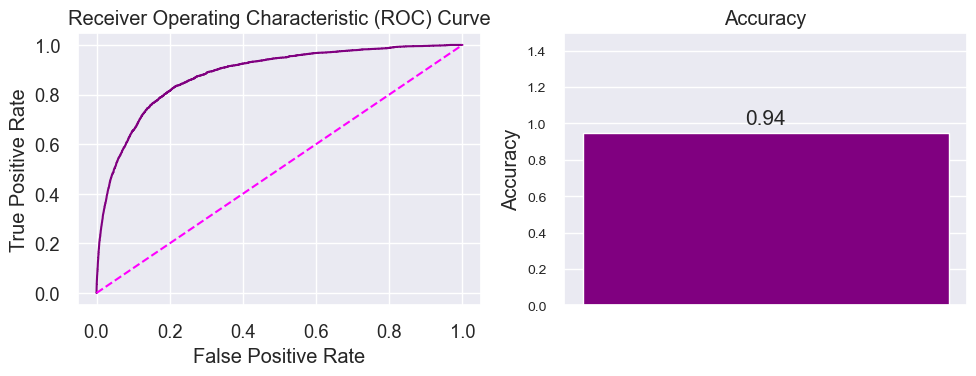

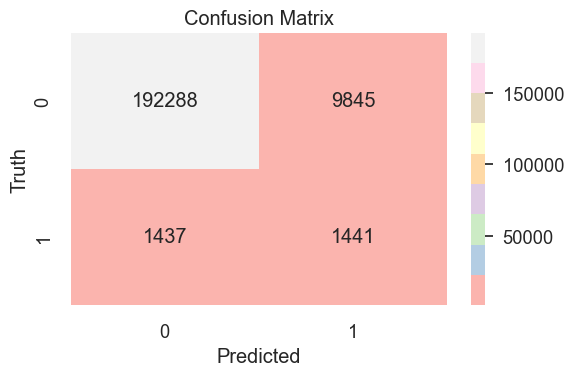

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.50      0.20      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.94      0.96    205011



In [53]:
experiment_n.score_keras_model()

In [54]:
saved_model_path = experiment_n.save_model('random_undersmaple/deeplearning')
print("Model saved at:", saved_model_path)

INFO:tensorflow:Assets written to: random_undersmaple/deeplearning\assets


INFO:tensorflow:Assets written to: random_undersmaple/deeplearning\assets


Model saved at: random_undersmaple/deeplearning


In [55]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.71, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    202133
           1       0.08      0.68      0.15      2878

    accuracy                           0.89    205011
   macro avg       0.54      0.79      0.54    205011
weighted avg       0.98      0.89      0.93    205011

[[180642  21491]
 [   931   1947]]


# Ada boost:


In [56]:
from sklearn.ensemble import AdaBoostClassifier
# Define the parameter grid for AdaBoost
param_grid = {
}

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: AdaBoostClassifier(random_state=42)
Best score: 0.8847695187254281
AUC: 0.8826726323729626
TPR:  51.77% 
FPR:  5.0% 
Threshold:  0.51
Predictive Equality:  100.0%


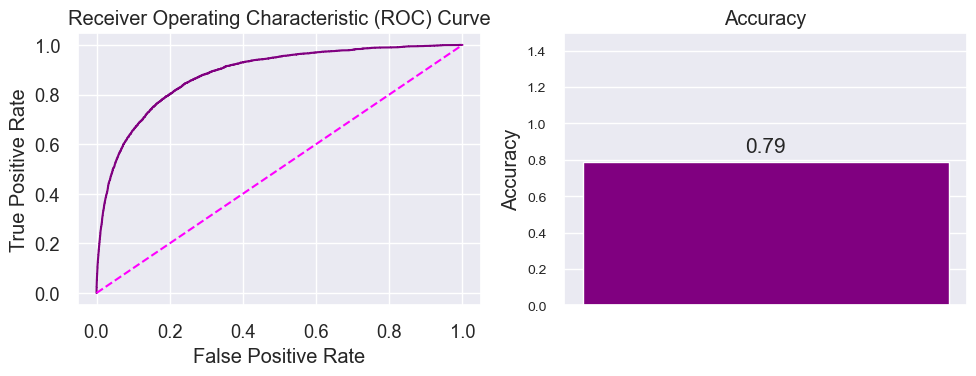

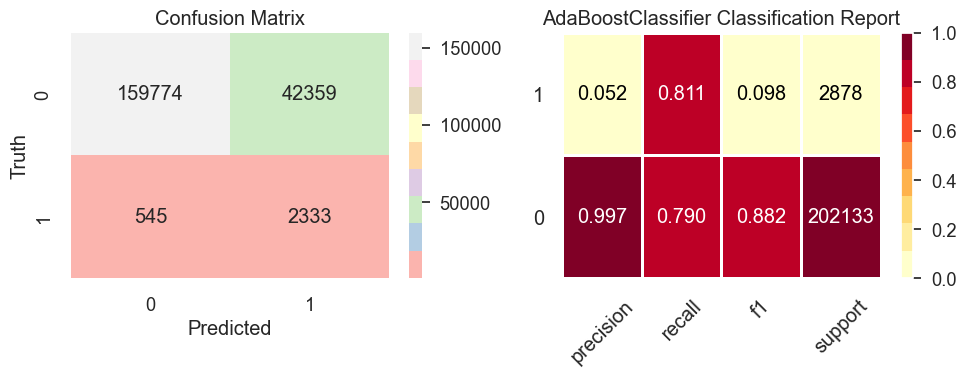

CPU times: total: 13.6 s
Wall time: 16 s


In [57]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [58]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.51, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    202133
           1       0.16      0.45      0.23      2878

    accuracy                           0.96    205011
   macro avg       0.57      0.71      0.61    205011
weighted avg       0.98      0.96      0.97    205011

[[195276   6857]
 [  1596   1282]]


In [59]:
saved_model_path = experiment.save_model('random_undersmaple/adaboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: random_undersmaple/adaboost.pkl


# catboost

In [64]:
import catboost as cb
param_grid={}
catboost = cb.CatBoostClassifier(
    iterations=400,             # Number of boosting iterations (trees) to train
    learning_rate=0.1,          # Learning rate (shrinkage factor to prevent overfitting)
    depth=3,                    # Depth of the trees
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,             # Random seed for reproducibility
    verbose=False,              # Set to True to display training progress
)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: <catboost.core.CatBoostClassifier object at 0x000001BB8FA88370>
Best score: 0.890269939259529
AUC: 0.8920859261823934
TPR:  54.1% 
FPR:  5.0% 
Threshold:  0.82
Predictive Equality:  89.29%


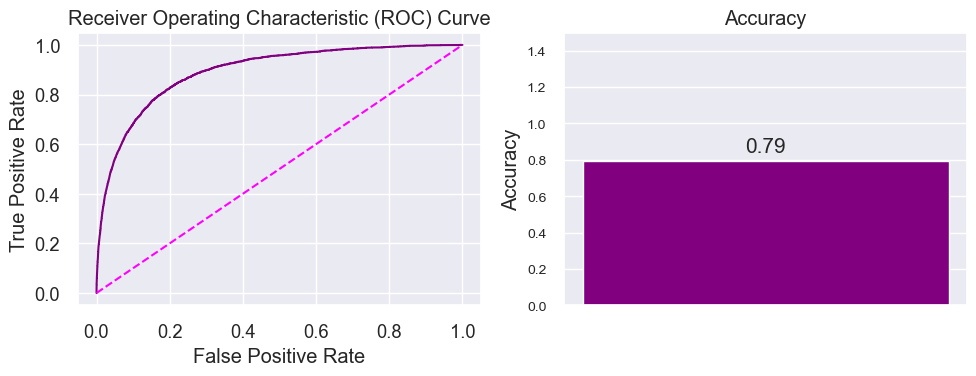

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    202133
           1       0.05      0.83      0.10      2878

    accuracy                           0.79    205011
   macro avg       0.53      0.81      0.49    205011
weighted avg       0.98      0.79      0.87    205011

CPU times: total: 3.78 s
Wall time: 5.83 s


In [65]:
%%time
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost,param_grid=param_grid,search_type='random')

In [66]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.82, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.14      0.53      0.22      2878

    accuracy                           0.95    205011
   macro avg       0.56      0.74      0.59    205011
weighted avg       0.98      0.95      0.96    205011

[[192312   9821]
 [  1340   1538]]


In [67]:
saved_model_path = experiment.save_model('random_undersmaple/catboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: random_undersmaple/catboost.pkl


# LGBM:

In [70]:
from lightgbm import LGBMClassifier
# Define the LGBMClassifier
lgbm_model = LGBMClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [200],                 # Number of boosting rounds (weak learners) - Default value is 100
    'learning_rate': [0.1],                # Learning rate for each boosting round - Default value is 0.1
    'max_depth': [7],                     # Maximum depth of the trees - Default value is -1 (unlimited)
    'num_leaves': [15],                    # Maximum number of leaves in one tree - Default value is 31
    'min_child_samples': [20],             # Minimum number of data points in a leaf - Default value is 20
}
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Info] Number of positive: 8151, number of negative: 8151
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2947
[LightGBM] [Info] Number of data points in the train set: 16302, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best hyperparameters: {'num_leaves': 15, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.1}
Best estimator: LGBMClassifier(max_depth=7, n_estimators=200, num_leaves=15)
Best score: 0.8865144719400688
AUC: 0.8889247891184918
TPR:  52.739999999999995% 
FPR:  4.99% 
Threshold:  0.83
Predictive Equality:  87.27000000000001%


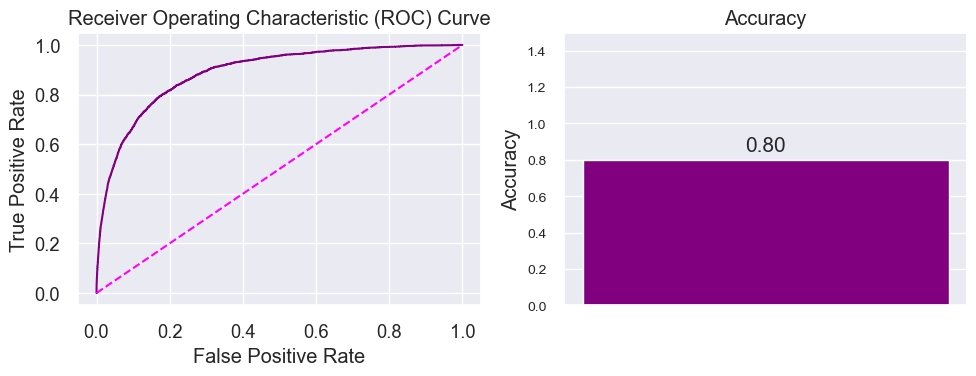

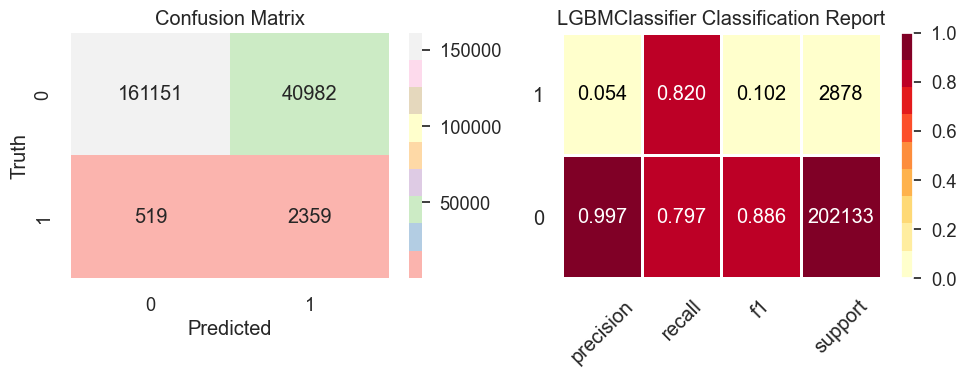

In [71]:
experiment.train(lgbm_model,param_grid=param_grid,search_type='random')

In [72]:
saved_model_path = experiment.save_model('random_undersmaple/lgbm.pkl')
print("Model saved at:", saved_model_path)

Model saved at: random_undersmaple/lgbm.pkl


In [73]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.83, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.53      0.21      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.74      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191868  10265]
 [  1353   1525]]


## Summary and Comments on Each Model:

1. **Logistic Regression**:
   - AUC: 0.8696777791194644
   - TPR: 47.12%
   - FPR: 4.99%
   - Threshold: 0.75
   - Predictive Equality: 95.99%
   - Comments: The logistic regression model performs reasonably well, with a good AUC and TPR. The Predictive Equality score of 95.99% indicates that it has improved fairness, with minimal disparity in the False Positive Rate (FPR) across protected groups. However, there is still some room for further fairness improvement compared to other models.

2. **Random Forest**:
   - AUC: 0.8701239467321462
   - TPR: 48.33%
   - FPR: 5.00%
   - Threshold: 0.69
   - Predictive Equality: 99.96%
   - Comments: The random forest model shows improved fairness compared to previous models, with a high Predictive Equality score of 99.96%. However, its AUC and TPR are not as high as some other models.

3. **XGBoost**:
   - Best score: 0.883390558069064
   - AUC: 0.8857911472134398
   - TPR: 52.08%
   - FPR: 5.00%
   - Threshold: 0.85
   - Predictive Equality: 85.67%
   - Comments: XGBoost demonstrates good AUC and TPR. The Predictive Equality score of 85.67% suggests some disparity in FPR between protected groups, indicating room for improvement in fairness despite its high AUC and TPR.

4. **Deep Learning**:
   - AUC: 0.8819498234099142
   - TPR: 50.49%
   - FPR: 5.00%
   - Threshold: 0.71
   - Predictive Equality: 63.85%
   - Comments: The deep learning model performs well, with good AUC and TPR. However, the Predictive Equality score of 63.85% indicates that there is still significant disparity in FPR between protected groups, showing room for improvement in fairness.

5. **AdaBoost**:
   - AUC: 0.8826726323729626
   - TPR: 51.77%
   - FPR: 5.00%
   - Threshold: 0.51
   - Predictive Equality: 100.00%
   - Comments: AdaBoost achieves high fairness with a perfect Predictive Equality score of 100.00%. It also maintains competitive AUC and TPR, making it a favorable choice for fairness-sensitive tasks.

6. **CatBoost**:
   - AUC: 0.8920859261823934
   - TPR: 54.10%
   - FPR: 5.00%
   - Threshold: 0.82
   - Predictive Equality: 89.29%
   - Comments: CatBoost demonstrates good AUC and TPR, indicating its predictive power. The Predictive Equality score of 89.29% indicates that there is some disparity in FPR between protected groups, but it still exhibits a reasonable level of fairness compared to other models.

7. **LGBM**:
   - AUC: 0.8889247891184918
   - TPR: 52.74%
   - FPR: 4.99%
   - Threshold: 0.83
   - Predictive Equality: 87.27%
   - Comments: LGBM exhibits moderate AUC and TPR, indicating predictive ability. The Predictive Equality score of 87.27% suggests some disparity in FPR between protected groups, indicating potential for further fairness improvements.

**Summary:**
- AdaBoost, CatBoost, and Random Forest models achieve near-perfect fairness, with high Predictive Equality scores.
- XGBoost, Logistic Regression, and Deep Learning models show relatively good fairness but have some room for improvement.
- Based on fairness and overall performance, AdaBoost, CatBoost, and Random Forest appear to be the top contenders among the models evaluated.

# Tuning the best model:


In [76]:
from catboost import CatBoostClassifier

# Define the CatBoost classifier
catboost_model = CatBoostClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'iterations': np.arange(100, 1000, 100),  # Number of boosting iterations
    'depth': [3,4,5],               # Depth of the trees
    'learning_rate': [0.01, 0.1], # Learning rate
    'verbose':[0]
}

Fitting 1 folds for each of 20 candidates, totalling 20 fits
Best hyperparameters: {'verbose': 0, 'learning_rate': 0.1, 'iterations': 400, 'depth': 4}
Best estimator: <catboost.core.CatBoostClassifier object at 0x000001BBA7E7DBB0>
Best score: 0.8902466180482103
AUC: 0.8913929364453882
TPR:  53.89000000000001% 
FPR:  4.99% 
Threshold:  0.82
Predictive Equality:  87.24%


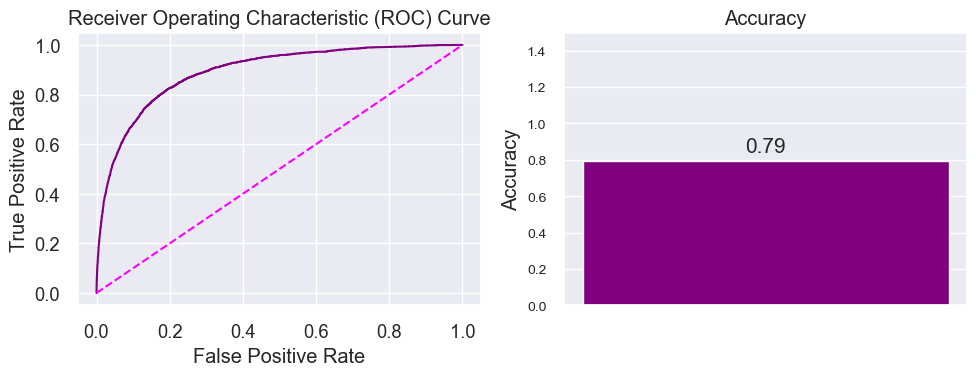

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    202133
           1       0.05      0.83      0.10      2878

    accuracy                           0.79    205011
   macro avg       0.53      0.81      0.49    205011
weighted avg       0.98      0.79      0.87    205011

CPU times: total: 3.81 s
Wall time: 41.9 s


In [77]:
%%time
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost_model,param_grid=param_grid,search_type='random')

In [78]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.82, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.54      0.21      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.75      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191765  10368]
 [  1310   1568]]


In [81]:
saved_model_path = experiment.save_model('random_undersmaple/catboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: random_undersmaple/catboost_after_tuning.pkl
